# Explore Basis Trade Data

In [1]:
import pandas as pd
import polars as pl

from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from settings import config
import load_bases_data

DATA_DIR = config("DATA_DIR")
MANUAL_DATA_DIR = config("MANUAL_DATA_DIR")

## Arbitrage Spreads

In [2]:
df = load_bases_data.load_combined_spreads_wide(data_dir=MANUAL_DATA_DIR)
# df = df.ffill(limit=5).dropna()
# df.info()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5563 entries, 2001-12-04 to 2024-02-28
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Box_06m            4435 non-null   float32
 1   Box_12m            4423 non-null   float32
 2   Box_18m            4435 non-null   float32
 3   CDS_Bond_HY        4280 non-null   float32
 4   CDS_Bond_IG        4437 non-null   float32
 5   CIP_AUD            5563 non-null   float32
 6   CIP_CAD            5456 non-null   float32
 7   CIP_CHF            5562 non-null   float32
 8   CIP_EUR            5562 non-null   float32
 9   CIP_GBP            5561 non-null   float32
 10  CIP_JPY            5493 non-null   float32
 11  CIP_NZD            5374 non-null   float32
 12  CIP_SEK            4894 non-null   float32
 13  Eq_SF_Dow          5106 non-null   float32
 14  Eq_SF_NDAQ         5090 non-null   float32
 15  Eq_SF_SPX          5088 non-null   float32
 16  TIPS_T

In [4]:
df.tail()

,Box_06m,Box_12m,Box_18m,CDS_Bond_HY,CDS_Bond_IG,CIP_AUD,CIP_CAD,CIP_CHF,CIP_EUR,CIP_GBP,...,Treasury_SF_10Y,Treasury_SF_20Y,Treasury_SF_30Y,Treasury_Swap_01Y,Treasury_Swap_02Y,Treasury_Swap_03Y,Treasury_Swap_05Y,Treasury_Swap_10Y,Treasury_Swap_20Y,Treasury_Swap_30Y
date,,,,,,,,,,,,,,,,,,,,,
2024-02-22,NaN,NaN,NaN,NaN,NaN,8.251404,17.293579,17.858582,5.813416,8.302063,...,-16.325012,-74.609985,-211.763977,4.56,-13.77,-21.139999,-29.330000,-41.220001,-69.800003,-78.449997
2024-02-23,NaN,NaN,NaN,NaN,NaN,6.583923,18.220825,12.748291,4.431885,8.169006,...,-15.239990,-59.401978,-190.694977,6.46,-13.30,-20.480000,-29.780001,-42.310001,-71.440002,-77.029999
2024-02-26,NaN,NaN,NaN,NaN,NaN,5.156189,18.380493,10.448364,2.971252,8.405518,...,-14.094971,-65.319977,-183.165985,5.58,-12.50,-20.879999,-28.650000,-42.099998,-71.699997,-77.980003
2024-02-27,NaN,NaN,NaN,NaN,NaN,6.320984,17.697937,18.856445,6.171143,8.237305,...,-18.984985,-63.867981,-194.381989,5.60,-12.95,-22.200001,-30.320000,-43.040001,-72.839996,-79.169998
2024-02-28,NaN,NaN,NaN,NaN,NaN,8.978394,18.759705,27.148132,8.660278,8.211975,...,-12.888000,-79.199005,-191.681000,4.94,-12.23,-21.049999,-28.900000,-42.540001,-71.650002,-77.550003


In [5]:
df.reindex(sorted(df.columns), axis=1).filter(regex=("Treasury_SF_*")).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5563 entries, 2001-12-04 to 2024-02-28
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Treasury_SF_02Y  4211 non-null   float32
 1   Treasury_SF_05Y  4575 non-null   float32
 2   Treasury_SF_10Y  4801 non-null   float32
 3   Treasury_SF_20Y  4836 non-null   float32
 4   Treasury_SF_30Y  2412 non-null   float32
dtypes: float32(5)
memory usage: 152.1 KB


<Axes: xlabel='date'>

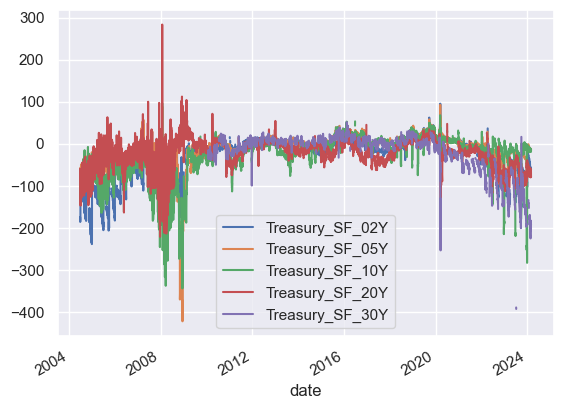

In [6]:
df.reindex(sorted(df.columns), axis=1).filter(regex=("Treasury_SF_*")).plot()

(-300.0, 200.0)

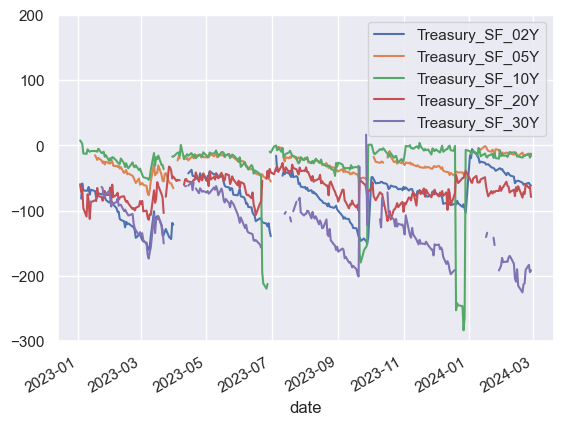

In [7]:
(
    df
    .loc["2023":,:]
    .reindex(sorted(df.columns), axis=1)
    .filter(regex=("Treasury_SF_*"))
    .plot()
)
plt.ylim([-300,200])

(-300.0, 200.0)

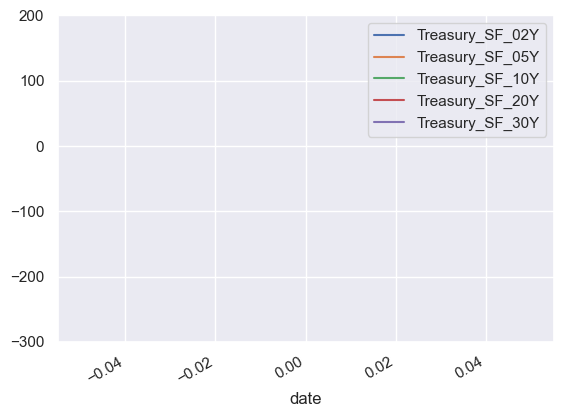

In [8]:
(
    df
    .loc["2024-07":,:]
    .reindex(sorted(df.columns), axis=1)
    .filter(regex=("Treasury_SF_*"))
    .plot()
)
plt.ylim([-300,200])

(-300.0, 200.0)

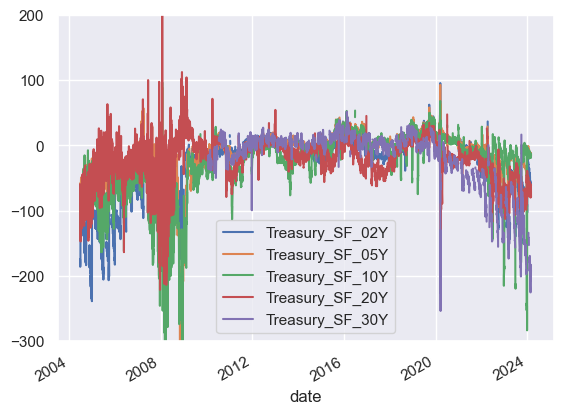

In [9]:
df.reindex(sorted(df.columns), axis=1).filter(regex=("Treasury_SF_*")).plot()
plt.ylim([-300,200])

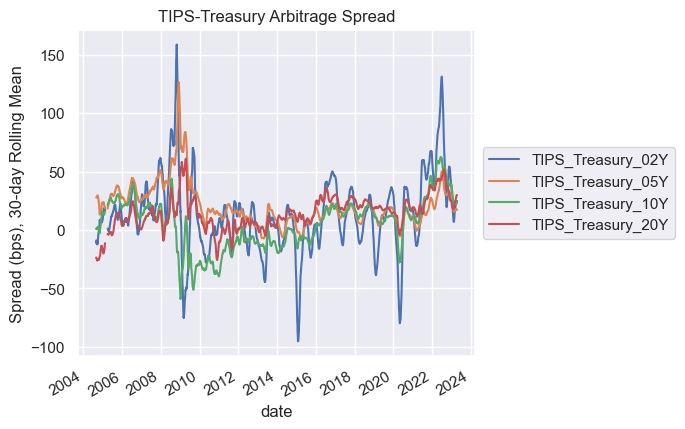

In [10]:
WINDOW = 30
ax= df.reindex(sorted(df.columns), axis=1).filter(regex=("TIPS_*")).rolling(WINDOW).mean().plot()
# plt.ylim([-100,100])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.title("TIPS-Treasury Arbitrage Spread");

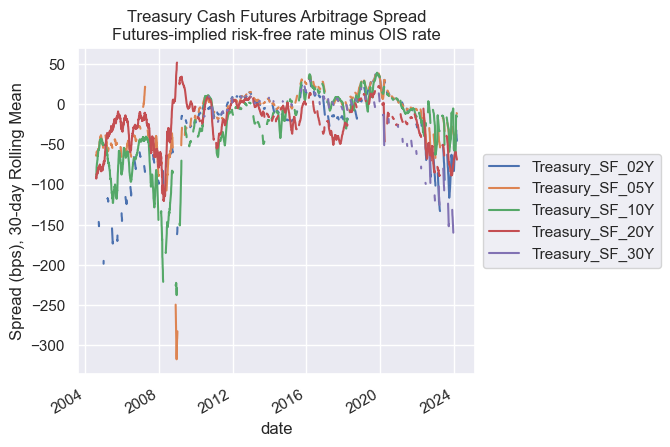

In [11]:
WINDOW = 30
ax= df.reindex(sorted(df.columns), axis=1).filter(regex=("Treasury_SF_*")).rolling(WINDOW).mean().plot()
# plt.ylim([-100,100])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.title("Treasury Cash Futures Arbitrage Spread\nFutures-implied risk-free rate minus OIS rate");

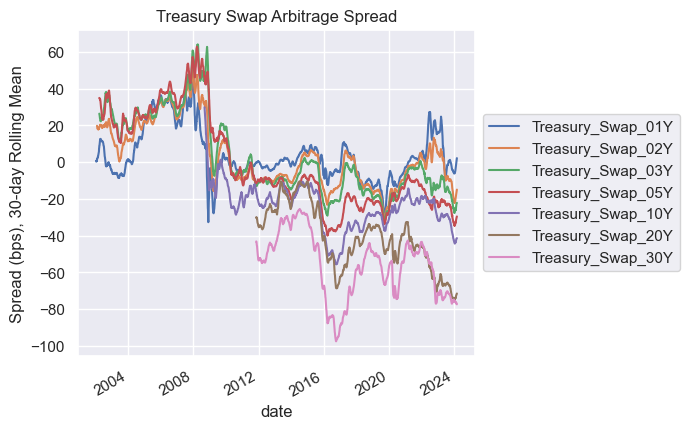

In [12]:
WINDOW = 30
ax= df.reindex(sorted(df.columns), axis=1).filter(regex=("Treasury_Swap_*")).rolling(WINDOW).mean().plot()
# plt.ylim([-100,100])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.title("Treasury Swap Arbitrage Spread");

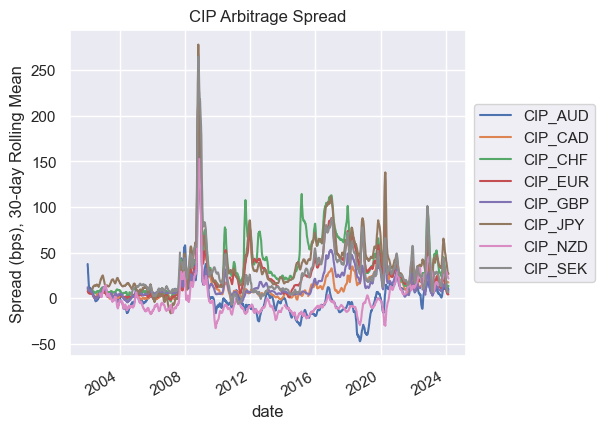

In [13]:
WINDOW = 30
ax= df.reindex(sorted(df.columns), axis=1).filter(regex=("CIP_*")).rolling(WINDOW).mean().plot()
# plt.ylim([-100,100])
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.ylabel(f"Spread (bps), {WINDOW}-day Rolling Mean")
plt.title("CIP Arbitrage Spread");

In [14]:
df

,Box_06m,Box_12m,Box_18m,CDS_Bond_HY,CDS_Bond_IG,CIP_AUD,CIP_CAD,CIP_CHF,CIP_EUR,CIP_GBP,...,Treasury_SF_10Y,Treasury_SF_20Y,Treasury_SF_30Y,Treasury_Swap_01Y,Treasury_Swap_02Y,Treasury_Swap_03Y,Treasury_Swap_05Y,Treasury_Swap_10Y,Treasury_Swap_20Y,Treasury_Swap_30Y
date,,,,,,,,,,,,,,,,,,,,,
2001-12-04,NaN,NaN,NaN,NaN,NaN,52.145401,NaN,13.314026,9.184860,11.789230,...,NaN,NaN,NaN,7.60,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-05,NaN,NaN,NaN,NaN,NaN,46.005219,NaN,12.012970,5.848602,15.825348,...,NaN,NaN,NaN,8.10,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-06,NaN,NaN,NaN,NaN,NaN,49.061096,NaN,16.064270,10.815582,12.939957,...,NaN,NaN,NaN,4.80,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-07,NaN,NaN,NaN,NaN,NaN,58.456711,NaN,15.164368,10.896408,21.666672,...,NaN,NaN,NaN,5.30,NaN,NaN,NaN,NaN,NaN,NaN
2001-12-10,NaN,NaN,NaN,NaN,NaN,53.464584,NaN,12.022736,8.434219,14.334442,...,NaN,NaN,NaN,2.20,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,NaN,NaN,NaN,NaN,NaN,8.251404,17.293579,17.858582,5.813416,8.302063,...,-16.325012,-74.609985,-211.763977,4.56,-13.77,-21.139999,-29.330000,-41.220001,-69.800003,-78.449997
2024-02-23,NaN,NaN,NaN,NaN,NaN,6.583923,18.220825,12.748291,4.431885,8.169006,...,-15.239990,-59.401978,-190.694977,6.46,-13.30,-20.480000,-29.780001,-42.310001,-71.440002,-77.029999
2024-02-26,NaN,NaN,NaN,NaN,NaN,5.156189,18.380493,10.448364,2.971252,8.405518,...,-14.094971,-65.319977,-183.165985,5.58,-12.50,-20.879999,-28.650000,-42.099998,-71.699997,-77.980003


In [15]:
# ax= (
#     df
#     .reindex(sorted(df.columns), axis=1)
#     .filter(regex=("CIP_*"))
#     .loc["2024-07":,:]
#     .dropna()
#     .plot()
# )

# plt.ylim([-100,100])
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# plt.ylabel(f"Spread (bps)")
# plt.title("CIP Arbitrage Spread");